In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [6]:
# Definamos el sistema en una tupla
G=(lambda x,y,z: 3*x - np.cos(y*z) - 1.5, \
   lambda x,y,z: 4*x**2 - 625*y**2 + 2*y -1, \
   lambda x,y,z: np.exp(-x*y) + 20*z + 9.471975 )

In [7]:
for i in range(3):
    print(G[i](0,0,0))

-2.5
-1
10.471975


In [8]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [9]:
def GetJacobian(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)
        J[i,2] = (  G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
        
    return J.T

In [10]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [12]:
GetMetric(G,[1,0,0])

59.456130200312515

In [37]:
def GetSolve(G,r,lr=1e-5,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        if it%500 == 0:
            print(it,d)
            clear_output(wait=True)
            time.sleep(0.02)
            
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

In [38]:
xsol,it,F,R = GetSolve(G,[0,0,0])

 Entrenamiento no completado 


In [39]:
xsol

array([ 0.83309162,  0.05493315, -0.52136212])

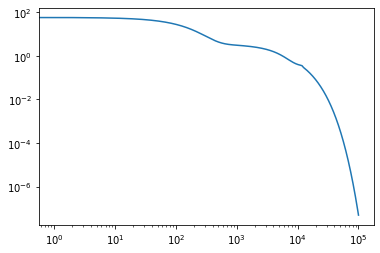

In [40]:
plt.plot(F)
plt.xscale('log')
plt.yscale('log')

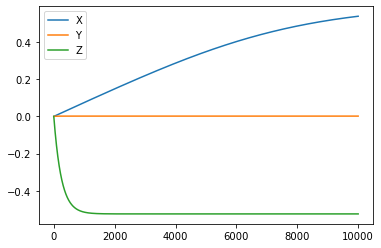

In [42]:
labels = ['X','Y','Z']

for i in range(3):
    plt.plot(R[:,i][:10000],label=labels[i])
plt.legend()